# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')

# Visualizing Data

In [2]:
df = pd.read_csv('appl_stock.csv')

In [3]:
df

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23
...,...,...,...,...,...,...
2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [5]:
df = df.reindex(index=df.index[::-1])
df = df.reset_index()
df

,index,Date,Close/Last,Volume,Open,High,Low
0,2517,03/01/2010,$29.8557,137312041,$29.3928,$29.9286,$29.35
1,2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771
2,2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
3,2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
4,2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
...,...,...,...,...,...,...,...
2513,4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23
2514,3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
2515,2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
2516,1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96


In [6]:
df = df.drop('index', 1)

In [7]:
df.columns = ['date', 'close', 'volume', 'open', 'high','low']

In [8]:
j=0
for i in df['close']:
    df['close'][j] = i[2:]
    j+=1
df['close']

0       29.8557
1       29.8357
2       29.9043
3       30.1014
4       31.2786
         ...   
2513     298.18
2514     288.08
2515     292.65
2516     273.52
2517     273.36
Name: close, Length: 2518, dtype: object

In [9]:
df['close'] = pd.to_numeric(df['close'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2518 non-null   object 
 1   close   2518 non-null   float64
 2   volume  2518 non-null   int64  
 3   open    2518 non-null   object 
 4   high    2518 non-null   object 
 5   low     2518 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 118.2+ KB


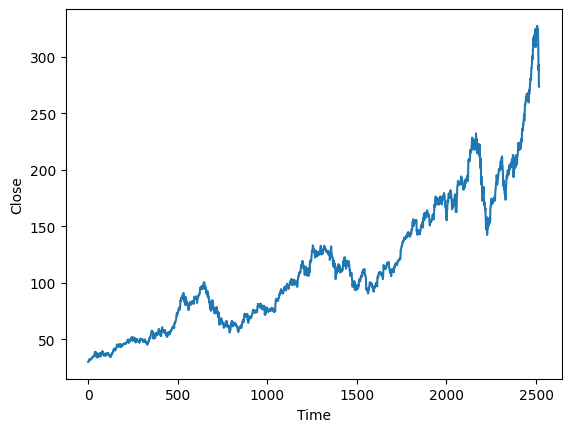

In [10]:
plt.plot(df['close'])
plt.ylabel('Close')
plt.xlabel('Time')
plt.show()

In [11]:
close = df['close']

In [12]:
close

0        29.8557
1        29.8357
2        29.9043
3        30.1014
4        31.2786
          ...   
2513    298.1800
2514    288.0800
2515    292.6500
2516    273.5200
2517    273.3600
Name: close, Length: 2518, dtype: float64

In [13]:
close = np.array(close)
close

array([ 29.8557,  29.8357,  29.9043, ..., 292.65  , 273.52  , 273.36  ])

In [14]:
close = close.reshape(-1,1)
close

array([[ 29.8557],
       [ 29.8357],
       [ 29.9043],
       ...,
       [292.65  ],
       [273.52  ],
       [273.36  ]])

# Normalizing the Data

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
close=scaler.fit_transform(close)

In [16]:
close

array([[6.72575693e-05],
       [0.00000000e+00],
       [2.30693463e-04],
       ...,
       [8.83812549e-01],
       [8.19480684e-01],
       [8.18942624e-01]])

In [17]:
train_s=int(len(close)*0.70)
test_s=len(close)-train_s
train = close[0:train_s,:]
test = close[train_s:len(close),:1]

In [18]:
train.shape

(1762, 1)

# Creating the Dataset
### Here we divide the dataset such that the sets contain prices of 100 days and then the price of the next day

In [19]:
def create_dataset(data,step):
    X=[]
    y=[]
    for i in range(len(data)-step-1):
        a = data[i:(i+step)]
        X.append(a)
        y.append(data[i+step])
    return np.array(X),np.array(y)

In [20]:
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [21]:
X_train.shape

(1661, 100, 1)

# Defining model layers

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dropout

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# Training

In [25]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
26/26 [==============================] - 14s 112ms/step - loss: 0.0044 - val_loss: 0.0188
Epoch 2/50
26/26 [==============================] - 1s 48ms/step - loss: 3.6622e-04 - val_loss: 0.0017
Epoch 3/50
26/26 [==============================] - 1s 47ms/step - loss: 2.1238e-04 - val_loss: 0.0029
Epoch 4/50
26/26 [==============================] - 1s 47ms/step - loss: 2.0018e-04 - val_loss: 0.0037
Epoch 5/50
26/26 [==============================] - 1s 47ms/step - loss: 2.0516e-04 - val_loss: 0.0023
Epoch 6/50
26/26 [==============================] - 1s 47ms/step - loss: 1.9575e-04 - val_loss: 0.0028
Epoch 7/50
26/26 [==============================] - 1s 48ms/step - loss: 1.8312e-04 - val_loss: 0.0025
Epoch 8/50
26/26 [==============================] - 1s 49ms/step - loss: 1.7970e-04 - val_loss: 0.0031
Epoch 9/50
26/26 [==============================] - 1s 46ms/step - loss: 1.7219e-04 - val_loss: 0.0033
Epoch 10/50
26/26 [==============================] - 1s 47ms/step - loss: 1

In [26]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


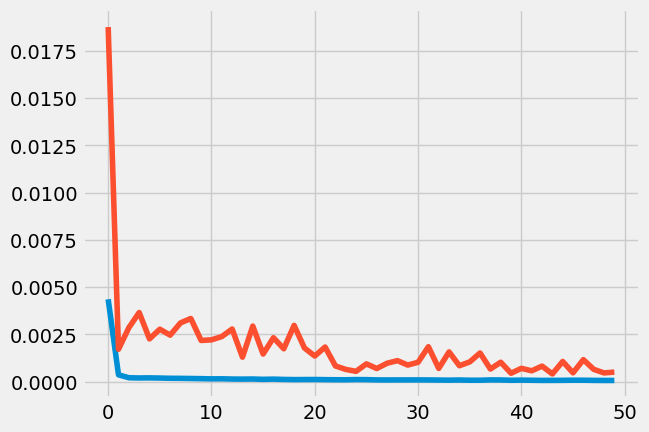

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [28]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

21/21 [==============================] - 0s 12ms/step


In [29]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,test_predict))

0.022597555380416176

In [31]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# Visualizing the results
### Here the model has predicted the prices using the last 100 days prices continously

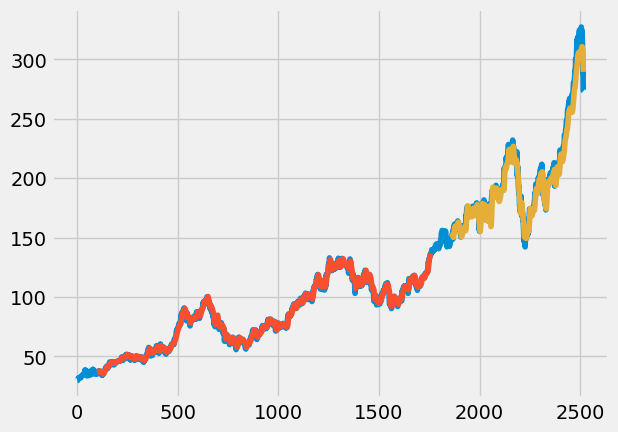

In [32]:
look_back=100
trainPredictPlot = np.empty_like(close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Prediction
### - In this section i have taken the first 100 days and then predicted the 101th day price and then appended the predicted price to the previous 100 days prices and took the the new 100 days prices i,e 2-101 days prices and predicted the next.
### - By doing this we can predict the next n day prices


In [ ]:
X_plot_full = close[-200:]

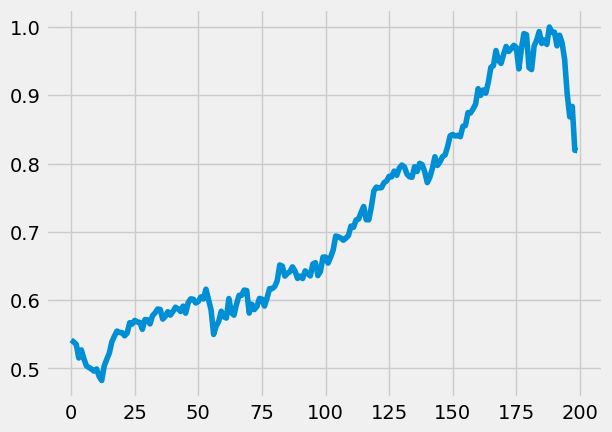

In [34]:
plt.plot(X_plot_full)
plt.show()

In [35]:
X_plot_full.shape

(200, 1)

In [36]:
x_input = X_plot_full[-100:].reshape((1,100))
x_input.shape

(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [38]:
temp_input[:10]

[0.6632413507606663,
 0.6542960940502945,
 0.6631404644067899,
 0.6734308725021799,
 0.6940116886929601,
 0.6928683100156945,
 0.6910187268612943,
 0.6878239923218759,
 0.6908842117227925,
 0.6946842643854693]

In [39]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):  
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        # print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        # print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.81129116]
101
[[0.8112911581993103], [0.7835710644721985], [0.7591541409492493], [0.7371183037757874], [0.7167393565177917], [0.6976578831672668], [0.6797831654548645], [0.6631603837013245], [0.6478734612464905], [0.6339940428733826], [0.6215611100196838], [0.6105768084526062], [0.6010100245475769], [0.5928017497062683], [0.5858705639839172], [0.5801181197166443], [0.5754334330558777], [0.5716978907585144], [0.5687885284423828], [0.5665813088417053], [0.5649546384811401], [0.5637907981872559], [0.5629785656929016], [0.5624146461486816], [0.5620042681694031], [0.5616629123687744], [0.5613157153129578], [0.5608988404273987], [0.560358464717865], [0.5596513152122498]]


In [40]:
day_new=np.arange(1,201)
day_pred=np.arange(201,231)

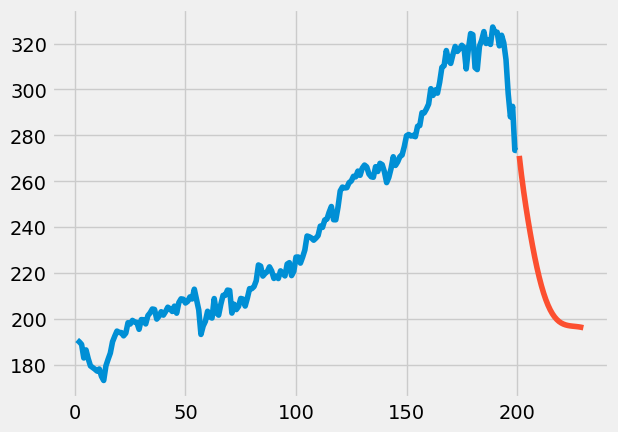

In [41]:
plt.plot(day_new,scaler.inverse_transform(X_plot_full))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

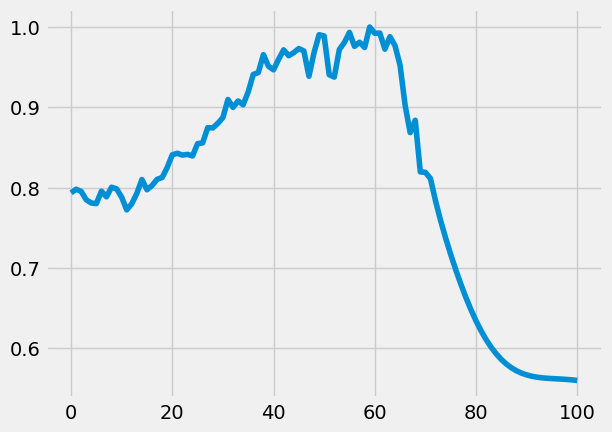

In [42]:
plt.plot(temp_input)